In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Implementation Question 1

## a) Use statistical methods and graphs/plots to describe your daataset.

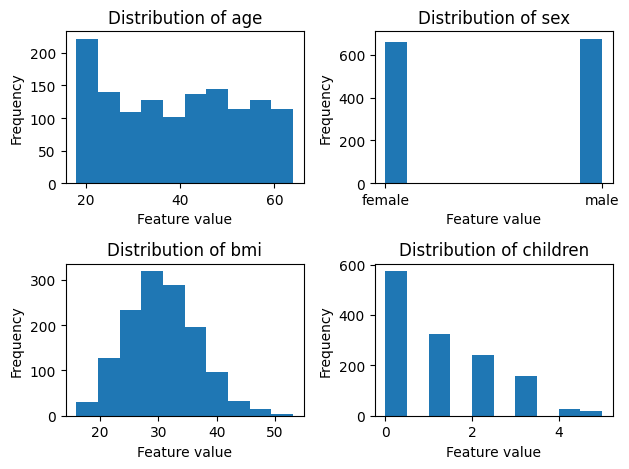

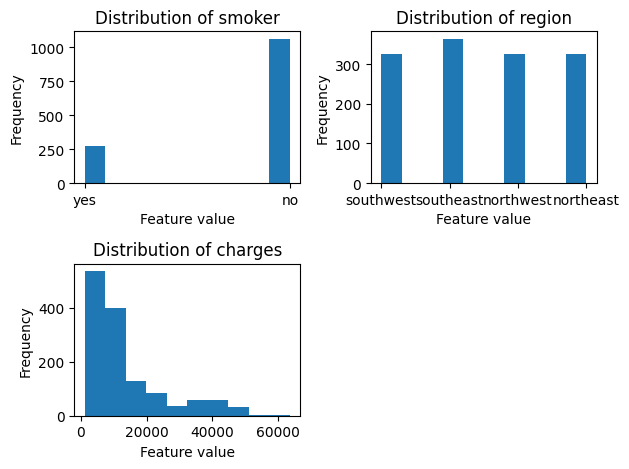

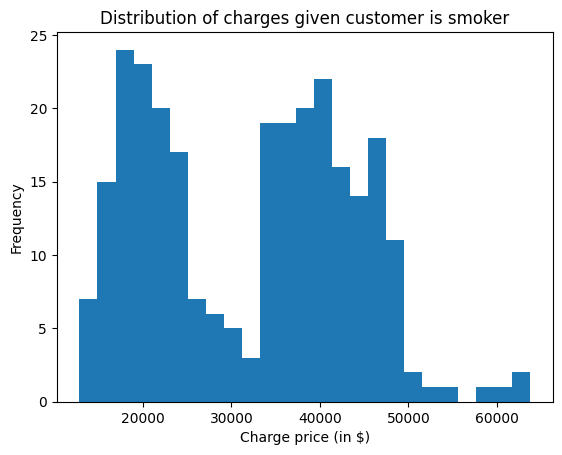

The average insuance charge for smokers is $32,050.23


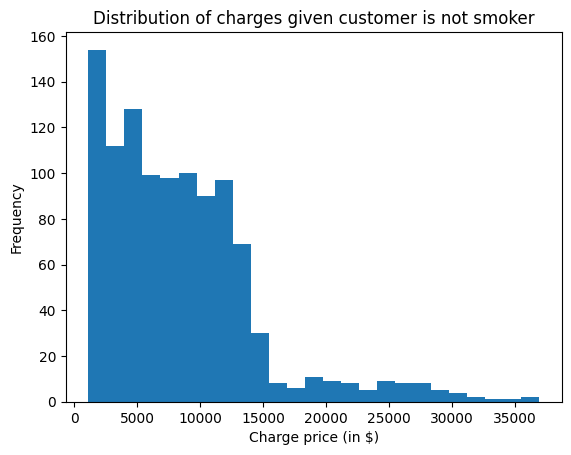

The average insuance charge for non-smokers is $8,434.27


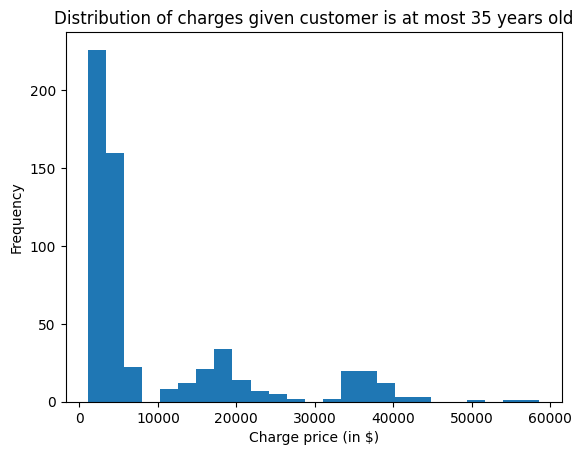

The average insuance charge for adults aged at most 35 is $9,744.48


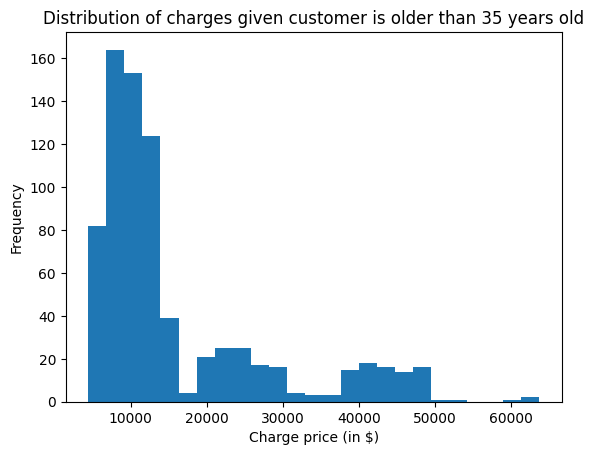

The average insuance charge for adults aged more than 35 is $15,919.50


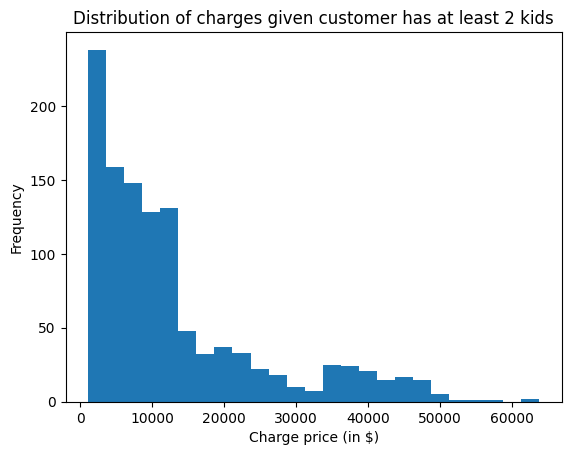

The average insuance charge for customers with at least 2 kids is $13,040.97


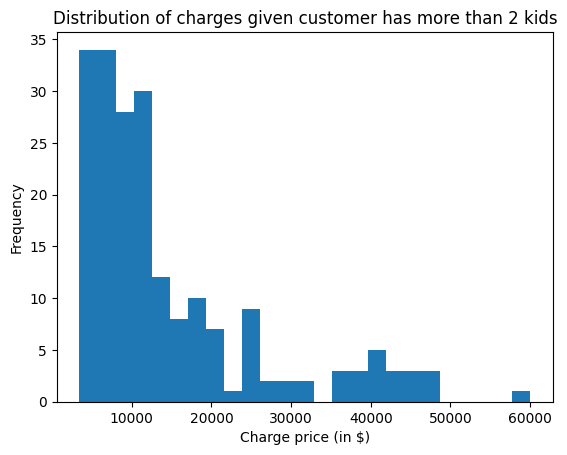

The average insuance charge for customers with more than 2 kids is $15,919.50


In [20]:
health_insurance_premiums = pd.read_csv("Health Insurance Dataset(insurance).csv")
health_insurance_premiums.columns[[0,1,2,3]]

for i, feature_name in enumerate(health_insurance_premiums.columns[[0,1,2,3]]):
    plt.subplot(2,2, i+1)

    plt.hist(health_insurance_premiums[feature_name])

    plt.title(f'Distribution of {feature_name}')
    plt.xlabel("Feature value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

for i, feature_name in enumerate(health_insurance_premiums.columns[[4,5,6]]):
    plt.subplot(2,2, i+1)

    plt.hist(health_insurance_premiums[feature_name])

    plt.title(f'Distribution of {feature_name}')
    plt.xlabel("Feature value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

smoker_charges = health_insurance_premiums[health_insurance_premiums.smoker == "yes"]
plt.hist(smoker_charges.charges, bins=25)
plt.title("Distribution of charges given customer is smoker")
plt.xlabel("Charge price (in $)")
plt.ylabel("Frequency")

plt.show()

print(f'The average insuance charge for smokers is ${smoker_charges.charges.mean():,.2f}')

non_smoker_charges = health_insurance_premiums[health_insurance_premiums.smoker == "no"]
plt.hist(non_smoker_charges.charges, bins=25)
plt.title("Distribution of charges given customer is not smoker")
plt.xlabel("Charge price (in $)")
plt.ylabel("Frequency")

plt.show()

print(f'The average insuance charge for non-smokers is ${non_smoker_charges.charges.mean():,.2f}')

adult_lessthan_35_charges = health_insurance_premiums[health_insurance_premiums.age <= 35]
plt.hist(adult_lessthan_35_charges.charges, bins=25)
plt.title("Distribution of charges given customer is at most 35 years old")
plt.xlabel("Charge price (in $)")
plt.ylabel("Frequency")

plt.show()

print(f'The average insuance charge for adults aged at most 35 is ${adult_lessthan_35_charges.charges.mean():,.2f}')

adult_morethan_35_charges = health_insurance_premiums[health_insurance_premiums.age > 35]
plt.hist(adult_morethan_35_charges.charges, bins=25)
plt.title("Distribution of charges given customer is older than 35 years old")
plt.xlabel("Charge price (in $)")
plt.ylabel("Frequency")

plt.show()

print(f'The average insuance charge for adults aged more than 35 is ${adult_morethan_35_charges.charges.mean():,.2f}')

atleast_2_kids = health_insurance_premiums[health_insurance_premiums.children <= 2]
plt.hist(atleast_2_kids.charges, bins=25)
plt.title("Distribution of charges given customer has at least 2 kids")
plt.xlabel("Charge price (in $)")
plt.ylabel("Frequency")

plt.show()

print(f'The average insuance charge for customers with at least 2 kids is ${atleast_2_kids.charges.mean():,.2f}')

morethan_2_kids = health_insurance_premiums[health_insurance_premiums.children > 2]
plt.hist(morethan_2_kids.charges, bins=25)
plt.title("Distribution of charges given customer has more than 2 kids")
plt.xlabel("Charge price (in $)")
plt.ylabel("Frequency")

plt.show()

print(f'The average insuance charge for customers with more than 2 kids is ${adult_morethan_35_charges.charges.mean():,.2f}')

## b) Split your dataset into train and test sets with a 7:3 ratio. Use the `train_test_split` tool from `scikit-learn`.

In [21]:
health_insurance_premiums['age'] = health_insurance_premiums['age'].astype(float)
health_insurance_premiums.loc[health_insurance_premiums['sex'] == "male", 'sex'] = 1.0
health_insurance_premiums.loc[health_insurance_premiums['sex'] == "female", 'sex'] = 2.0
health_insurance_premiums['children'] = health_insurance_premiums['children'].astype(float)
health_insurance_premiums.loc[health_insurance_premiums['smoker'] == "yes", 'smoker'] = 1.0
health_insurance_premiums.loc[health_insurance_premiums['smoker'] == "no", 'smoker'] = 0.0
health_insurance_premiums.loc[health_insurance_premiums['region'] == "southwest", 'region'] = 1.0
health_insurance_premiums.loc[health_insurance_premiums['region'] == "southeast", 'region'] = 2.0
health_insurance_premiums.loc[health_insurance_premiums['region'] == "northwest", 'region'] = 3.0
health_insurance_premiums.loc[health_insurance_premiums['region'] == "northeast", 'region'] = 4.0

train_data, test_data, train_target, test_target = train_test_split(health_insurance_premiums[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].to_numpy(),
                                                                    health_insurance_premiums.charges.to_numpy(),
                                                                    test_size=0.3,
                                                                    random_state=42)
print(health_insurance_premiums.shape)
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(1338, 7)
(936, 6)
(402, 6)
(936,)
(402,)


## c) Build and train a Linear Regression model using scikit-learn. Explore the parameters of the model in `scikit-learn`, and aim for higher accuracies.

In [22]:
linear_regression_model = LinearRegression().fit(train_data, train_target)
linear_regression_model_accuracy = linear_regression_model.score(test_data, test_target)
print(f'Logistic Regession model has an accuracy of {linear_regression_model_accuracy:.2f}')

Logistic Regession model has an accuracy of 0.77


## d) Evaluate the performance of your model on both the train and test sets (separately). You can use `scikit-learn`’s `mean_squared_error` tool.

In [23]:
print(f'Health insurance premiums training error:')
print(f'-' * 100)
print()
print(f"{mean_squared_error(y_true=train_target, y_pred=linear_regression_model.predict(train_data)):,.2f}")

print()
print(f'Health insurance premiums test error:')
print(f'-' * 100)
print()
print(f"{mean_squared_error(y_true=test_target, y_pred=linear_regression_model.predict(test_data)):,.2f}")

Health insurance premiums training error:
----------------------------------------------------------------------------------------------------

37,751,183.76

Health insurance premiums test error:
----------------------------------------------------------------------------------------------------

33,805,466.90


# Implementation Question 2

## a) Use statistical methods and graphs/plots to describe your daataset.

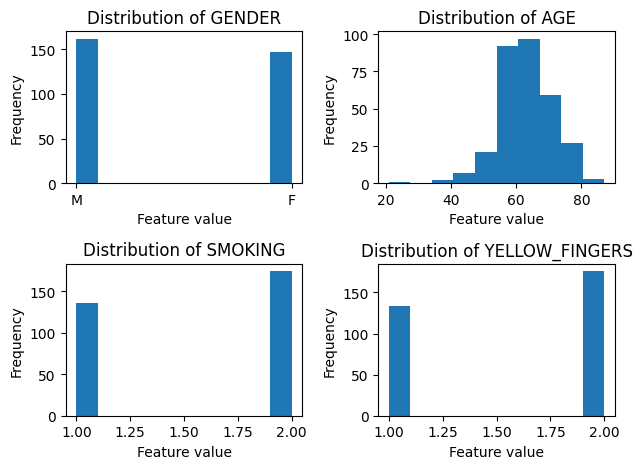

In [24]:
lung_cancer_dataset = pd.read_csv("lung cancer dataset.csv")

for i, feature_name in enumerate(lung_cancer_dataset.columns[[0,1,2,3]]):
    plt.subplot(2,2, i+1)

    plt.hist(lung_cancer_dataset[feature_name])

    plt.title(f'Distribution of {feature_name}')
    plt.xlabel("Feature value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

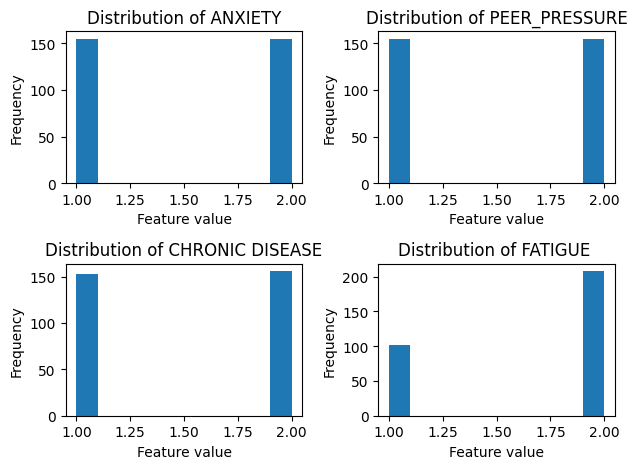

In [25]:
for i, feature_name in enumerate(lung_cancer_dataset.columns[[4,5,6,7]]):
    plt.subplot(2,2, i+1)

    plt.hist(lung_cancer_dataset[feature_name])

    plt.title(f'Distribution of {feature_name}')
    plt.xlabel("Feature value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

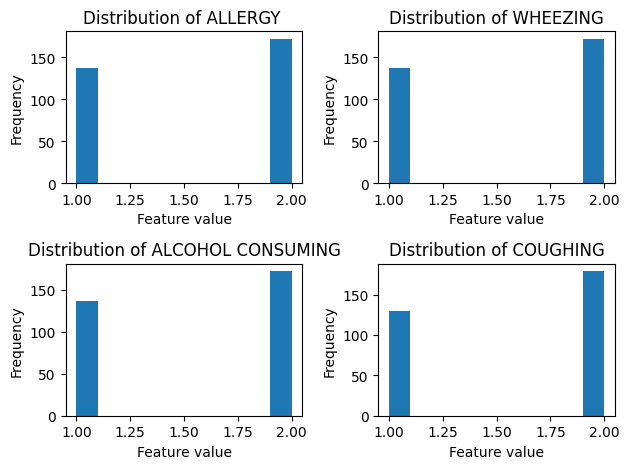

In [26]:
for i, feature_name in enumerate(lung_cancer_dataset.columns[[8,9,10,11]]):
    plt.subplot(2,2, i+1)

    plt.hist(lung_cancer_dataset[feature_name])

    plt.title(f'Distribution of {feature_name}')
    plt.xlabel("Feature value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

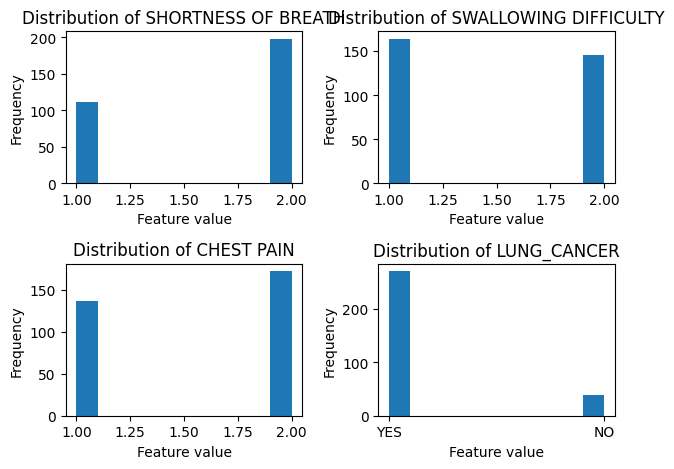

In [27]:
for i, feature_name in enumerate(lung_cancer_dataset.columns[[12,13,14,15]]):
    plt.subplot(2,2, i+1)

    plt.hist(lung_cancer_dataset[feature_name])

    plt.title(f'Distribution of {feature_name}')
    plt.xlabel("Feature value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

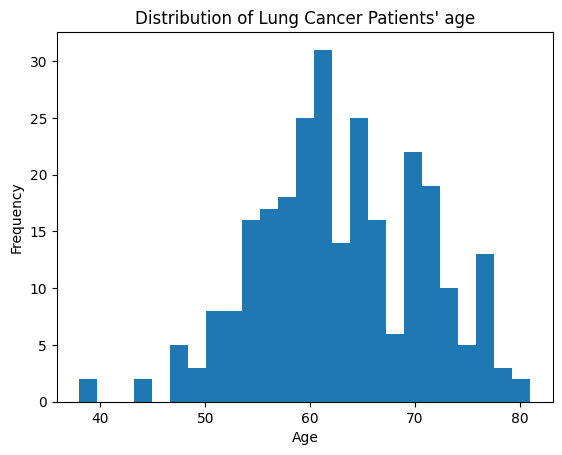

In [28]:
age_has_lung_cancer = lung_cancer_dataset[lung_cancer_dataset['LUNG_CANCER'] == "YES"]
plt.hist(age_has_lung_cancer.AGE, bins=25)
plt.title("Distribution of Lung Cancer Patients' age")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.show()

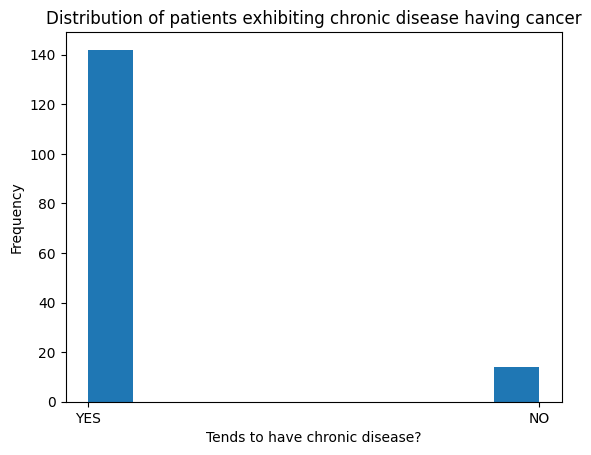

In [29]:
chronic_disease = lung_cancer_dataset[lung_cancer_dataset['CHRONIC DISEASE'] == 2]
plt.hist(chronic_disease.LUNG_CANCER)
plt.title("Distribution of patients exhibiting chronic disease having cancer")
plt.xlabel("Tends to have chronic disease?")
plt.ylabel("Frequency")

plt.show()

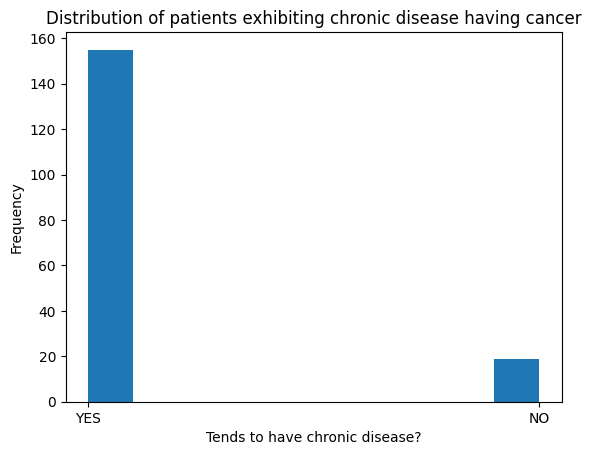

In [30]:
smoker = lung_cancer_dataset[lung_cancer_dataset['SMOKING'] == 2]
plt.hist(smoker.LUNG_CANCER)
plt.title("Distribution of patients exhibiting chronic disease having cancer")
plt.xlabel("Tends to have chronic disease?")
plt.ylabel("Frequency")

plt.show()

## b) Split your dataset into train and test sets with a 7:3 ratio. Use the `train_test_split` tool from `scikit-learn`.

In [31]:
lung_cancer_dataset.loc[lung_cancer_dataset['GENDER'] == "M", 'GENDER'] = 1.0
lung_cancer_dataset.loc[lung_cancer_dataset['GENDER'] == "F", 'GENDER'] = 2.0
lung_cancer_dataset.loc[lung_cancer_dataset['LUNG_CANCER'] == "YES", 'LUNG_CANCER'] = 1.0
lung_cancer_dataset.loc[lung_cancer_dataset['LUNG_CANCER'] == "NO", 'LUNG_CANCER'] = 0.0
lung_cancer_dataset = lung_cancer_dataset.astype(float)

train_data, test_data, train_target, test_target = train_test_split(lung_cancer_dataset.loc[:, lung_cancer_dataset.columns != 'LUNG_CANCER'].to_numpy(),
                                                                    lung_cancer_dataset.LUNG_CANCER.to_numpy(),
                                                                    test_size=0.3,
                                                                    random_state=42)
print(lung_cancer_dataset.shape)
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(309, 16)
(216, 15)
(93, 15)
(216,)
(93,)


## c) Build and train a Logistic Regression model using scikit-learn. Explore the parameters of the model in `scikit-learn`, and aim for higher accuracies.

In [32]:
logistic_regression_model = LogisticRegression(random_state=42, solver="liblinear", max_iter=350, verbose=1).fit(train_data, train_target)
logistic_regression_model_accuracy = logistic_regression_model.score(test_data, test_target)
print(f'Logistic Regession model has an accuracy of {logistic_regression_model_accuracy:.2f}')

[LibLinear]Logistic Regession model has an accuracy of 0.94


## d) Evaluate the performance of your model on both the train and test sets (separately). You can use `scikit-learn`’s `classification_report` tool.

In [33]:
print(f'Lung cancer training data classification report:')
print(f'-' * 100)
print()
print(classification_report(y_true=train_target, y_pred=logistic_regression_model.predict(train_data), target_names=["NO", "YES"]))

print()
print(f'Lung cancer test data classification report:')
print(f'-' * 100)
print()
print(classification_report(y_true=test_target, y_pred=logistic_regression_model.predict(test_data), target_names=["NO", "YES"]))

Lung cancer training data classification report:
----------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

          NO       0.82      0.28      0.42        32
         YES       0.89      0.99      0.94       184

    accuracy                           0.88       216
   macro avg       0.85      0.64      0.68       216
weighted avg       0.88      0.88      0.86       216


Lung cancer test data classification report:
----------------------------------------------------------------------------------------------------

              precision    recall  f1-score   support

          NO       0.60      0.43      0.50         7
         YES       0.95      0.98      0.97        86

    accuracy                           0.94        93
   macro avg       0.78      0.70      0.73        93
weighted avg       0.93      0.94      0.93        93

